In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Number of penguins of each species on each island:
island     Biscoe  Dream  Torgersen
species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0


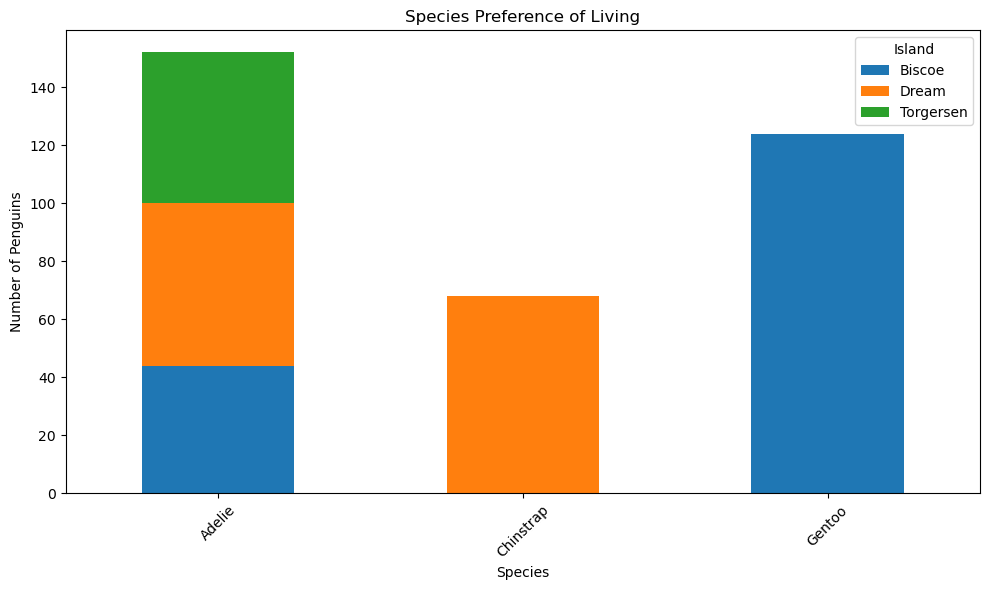

In [146]:

# Load the dataset
penguins_df = pd.read_csv("penguins_size.csv")

# Display the first few rows of the dataframe
print(penguins_df.head())

# Species preference of living: Count the number of penguins of each species on each island
species_island_counts = penguins_df.groupby(['species', 'island']).size().unstack(fill_value=0)
print("\nNumber of penguins of each species on each island:")
print(species_island_counts)

# Plot species preference of living
species_island_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Species Preference of Living')
plt.xlabel('Species')
plt.ylabel('Number of Penguins')
plt.xticks(rotation=45)
plt.legend(title='Island')
plt.tight_layout()
plt.show()





Average physical characteristics for adelies on each island:
      Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0     Biscoe           38.975000          18.370455           188.795455   
1      Dream           38.501786          18.251786           189.732143   
2  Torgersen           38.950980          18.429412           191.196078   

   Body Mass (g)  
0    3709.659091  
1    3688.392857  
2    3706.372549  


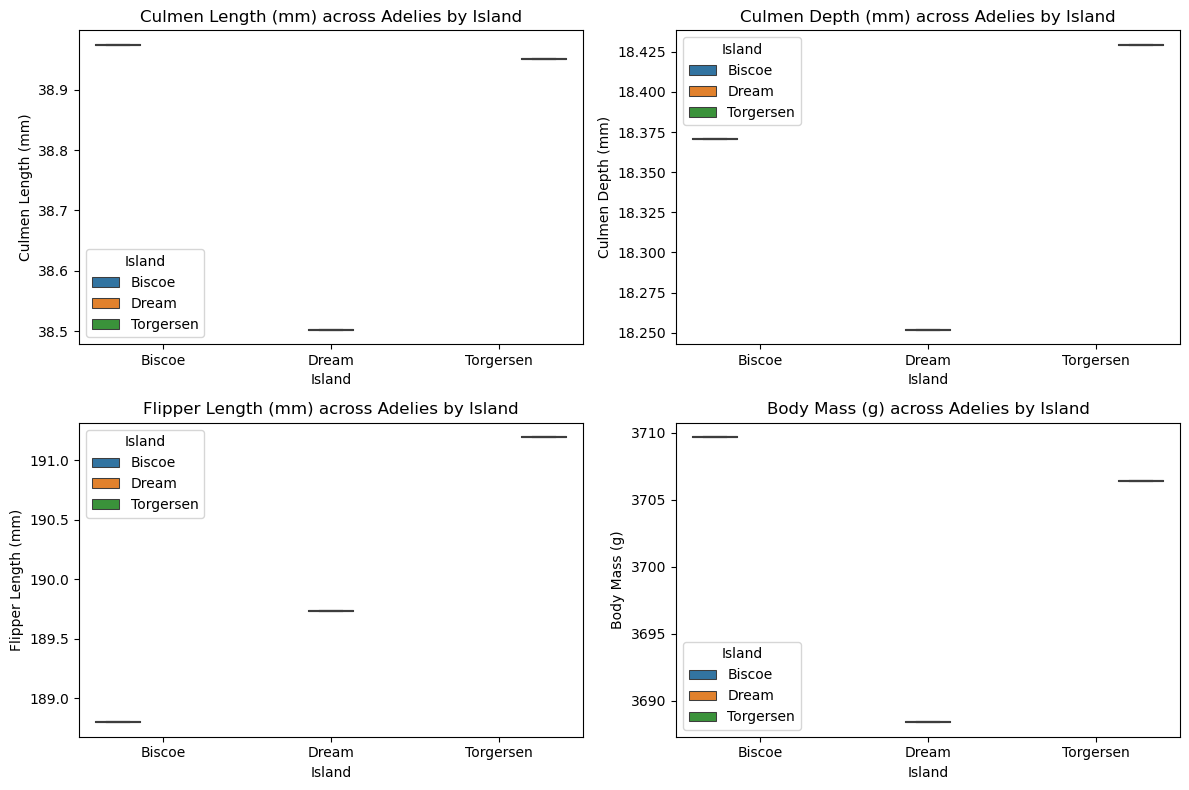

In [147]:
penguins_it = pd.read_csv("penguins_lter.csv")

adelies = penguins_it[penguins_it["Species"] == "Adelie Penguin (Pygoscelis adeliae)"]

physical_characteristics = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

# Calculate average physical characteristics for each species on each island
adelies_island_avg = adelies.groupby(['Island'])[physical_characteristics].mean().reset_index()
print("\nAverage physical characteristics for adelies on each island:")
print(adelies_island_avg)

# Plot influence of habitats on physical characteristics
plt.figure(figsize=(12, 8))
for i, char in enumerate(physical_characteristics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=adelies_island_avg, x='Island', y=char, hue='Island')
    plt.title(f'{char} across Adelies by Island')
    plt.xlabel('Island')
    plt.ylabel(char)
    plt.legend(title='Island')
plt.tight_layout()
plt.show()

# ***Model Code***

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("penguins_lter.csv")
test = pd.read_csv("penguins_size.csv")

In [149]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [150]:
train.nunique()

studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64

In [151]:
#drop unnecessary data
train = train.drop(["Region", "studyName", "Sample Number", "Stage", "Individual ID", "Clutch Completion", "Date Egg", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Comments"], axis=1)
train.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [152]:
train["Species"].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [153]:
#fill in NaN data with the mean of each column
#Culmen Length null values
avg_c_length = train["Culmen Length (mm)"].mean()
train["Culmen Length (mm)"] = train["Culmen Length (mm)"].fillna(avg_c_length)

#Culmen Depth null values
avg_c_depth = train["Culmen Depth (mm)"].mean()
train["Culmen Depth (mm)"] = train["Culmen Depth (mm)"].fillna(avg_c_depth)

#Flipper Length null values
avg_f_length = train["Flipper Length (mm)"].mean()
train["Flipper Length (mm)"] = train["Flipper Length (mm)"].fillna(avg_f_length)

#Body Mass Null Values
avg_mass = train["Body Mass (g)"].mean()
train["Body Mass (g)"] = train["Body Mass (g)"].fillna(avg_mass)

#Sex null values - set to MALE
train["Sex"] = train["Sex"].fillna("MALE")
#Sex values thats "." are set to FEMALE
train['Sex'] = train['Sex'].replace('.', 'FEMALE')

#changing islands to numercial data
#[0,1,2] = [Biscoe, Dream, Torgersen]
le = LabelEncoder()
train["Island"] = le.fit_transform(train["Island"])

#Species to numerical data
#[0,1,2] = ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)']
train["Species"] = le.fit_transform(train["Species"])

#Sex to numerical data
#[0,1] = [FEMALE, MALE]
train["Sex"] = le.fit_transform(train["Sex"])
train["Sex"].unique()


array([1, 0])

In [154]:
train_reset_index = train.reset_index(drop=True)
test_reset_index = test.reset_index(drop=True)

# Merge the DataFrames
merged_df = pd.concat([train_reset_index, test_reset_index], axis=1)

# If you don't want to keep duplicate columns (if any) from both DataFrames, you can drop them
merged_df = merged_df.drop(["species", "island", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"], axis=1)

merged_df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [155]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#Splitting the dataframe into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
        merged_df.drop(['Island'], axis=1),
        merged_df['Island'],
        test_size=1/4.0,
        random_state=0
    )

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

model = DecisionTreeClassifier(**best_params)
model.fit(X_train, Y_train)

# Evaluate the model on the testing set
#merged_df = merged_df.drop("Island")
Y_test_predictions = model.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("F1 score on testing set = ", f1_score(Y_test, Y_test_predictions, average='weighted'))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy on testing set =  0.5930232558139535
F1 score on testing set =  0.6236987818383166
